In [1]:
import scutquant
import numpy as np
import pandas as pd

df = pd.read_csv('D:/Desktop/pta.csv', encoding='gbk')
df.set_index(['时间'], inplace=True)

In [2]:
df = scutquant.clean(df)
df['wave'] = df['最高'] - df['最低']
df['mean'] = (df['开盘'] + df['收盘']) / 2
df['dhigh'] = df['最高'] - df['mean']
df['dlow'] = df['最低'] - df['mean']
df['amount'] = df['成交量'] * df['mean']
df['t'] = np.arange(len(df.index))
df['t2'] = df['t'] ** 2
df['label'] = df['收盘'] / df['开盘']

for i in range(1, 25):  # 根据过去2小时的数据构建特征
    df['open' + str(i)] = df['开盘'].shift(i)
    df['high' + str(i)] = df['最高'].shift(i)
    df['low' + str(i)] = df['最低'].shift(i)
    df['volume' + str(i)] = df['成交量'].shift(i)
    df['dhigh' + str(i)] = df['dhigh'].shift(i)
    df['dlow' + str(i)] = df['dlow'].shift(i)
    df['wave' + str(i)] = df['wave'].shift(i)
    df['mean' + str(i)] = df['mean'].shift(i)
    df['amount' + str(i)] = df['amount'].shift(i)
    df['label' + str(i)] = df['label'].shift(i)
    df['dif' + str(i)] = df['MACD_DIF'].shift(i)
    df['dea' + str(i)] = df['MACD_DEA'].shift(i)
    df['macd' + str(i)] = df['MACD_MACD'].shift(i)

df = df.drop(
    ['dhigh', 'dlow', 'wave', 'mean', 'amount', '开盘', '收盘', '成交量', '最低', '最高', 'MACD_DIF', 'MACD_DEA', 'MACD_MACD'],
    axis=1)

<class 'pandas.core.frame.DataFrame'>
Index: 18900 entries,  2021/07/27-22:50 to  2022/09/14-15:00
Columns: 315 entries, t to macd24
dtypes: float64(313), int32(2)
memory usage: 45.4+ MB
None
X_mis= 0.0655076845553036
clean dataset done 

pop label done 

label norm done 



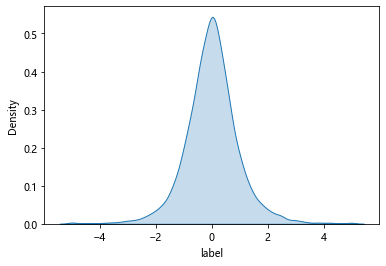

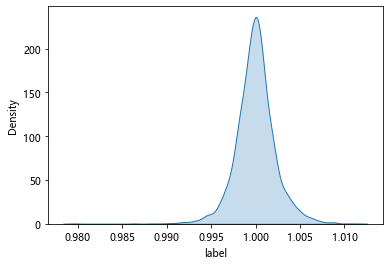

norm data done 

                 t        t2     open1     high1      low1   volume1  \
t         1.000000  0.968433  0.808963  0.808679  0.809353 -0.055848   
t2        0.968433  1.000000  0.895344  0.895006  0.895763 -0.021303   
open1     0.808963  0.895344  1.000000  0.999934  0.999934  0.066628   
high1     0.808679  0.895006  0.999934  1.000000  0.999914  0.071043   
low1      0.809353  0.895763  0.999934  0.999914  1.000000  0.061876   
...            ...       ...       ...       ...       ...       ...   
amount24  0.079511  0.125956  0.223309  0.223698  0.222641  0.083882   
label24   0.003513  0.000980  0.009615  0.009565  0.009814 -0.002541   
dif24     0.026741  0.010942  0.030068  0.029963  0.029889  0.026370   
dea24     0.020448  0.004914  0.028237  0.028132  0.028082  0.029849   
macd24   -0.009790 -0.003661 -0.001526 -0.001456 -0.001325  0.001462   

            dhigh1     dlow1     wave1     mean1  ...  volume24   dhigh24  \
t         0.153785 -0.143680  0.170905  0

In [3]:
x_train, x_test, y_train, y_test, ymean, ystd = scutquant.AutoProcessor(df, y='label', norm='r')

In [4]:
model = scutquant.hybrid()
model.fit(x_train, y_train, x_test, (y_test-ymean)/ystd)

[0]	validation_0-rmse:1.21700
[1]	validation_0-rmse:1.20872
[2]	validation_0-rmse:1.20119
[3]	validation_0-rmse:1.19391
[4]	validation_0-rmse:1.18739
[5]	validation_0-rmse:1.18137
[6]	validation_0-rmse:1.17589
[7]	validation_0-rmse:1.17070
[8]	validation_0-rmse:1.16614
[9]	validation_0-rmse:1.16188
[10]	validation_0-rmse:1.16203
[11]	validation_0-rmse:1.15834
[12]	validation_0-rmse:1.15466
[13]	validation_0-rmse:1.15114
[14]	validation_0-rmse:1.14785
[15]	validation_0-rmse:1.14504
[16]	validation_0-rmse:1.14245
[17]	validation_0-rmse:1.14001
[18]	validation_0-rmse:1.13786
[19]	validation_0-rmse:1.13583
[20]	validation_0-rmse:1.13383
[21]	validation_0-rmse:1.13221
[22]	validation_0-rmse:1.13080
[23]	validation_0-rmse:1.12945
[24]	validation_0-rmse:1.12837
[25]	validation_0-rmse:1.12716
[26]	validation_0-rmse:1.12807
[27]	validation_0-rmse:1.12679
[28]	validation_0-rmse:1.12573
[29]	validation_0-rmse:1.12475
[30]	validation_0-rmse:1.12397
[31]	validation_0-rmse:1.12312
[32]	validation_0-

In [5]:
pred = model.predict(x_test)
pred = pd.Series(pred, index=y_test.index)
pred += ymean
pred *= ystd
print('pearson_corr=', scutquant.pearson_corr(pred, y_test))

pearson_corr= 0.05497137504686051


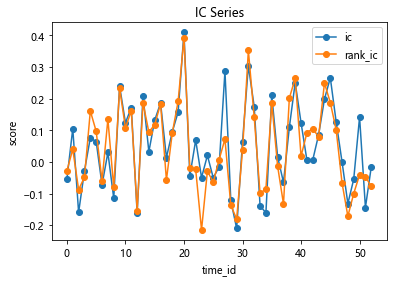

IC= 0.051228910466661746 ICIR= 0.3658787930064872 Rank_IC= 0.04284107866190291 Rank_ICIR= 0.3071806814151163


In [6]:
IC, ICIR, Rank_IC, Rank_ICIR = scutquant.ic_ana(pred, y_test, freq=72)
print('IC=', IC, 'ICIR=', ICIR, 'Rank_IC=', Rank_IC, 'Rank_ICIR=', Rank_ICIR)

In [7]:
model.dump('D:/Desktop')